In [1]:
%load_ext autoreload 
%autoreload 2 
%matplotlib inline

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import sklearn as sk 
import os 
import sys 
from IPython.display import display, Audio
import librosa

import torch
from torch import nn 
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchaudio import transforms as trans


In [13]:
import common as com
from train import *

In [5]:
param = com.yaml_load()

In [11]:
dirs = com.select_dirs(param=param, mode=True)
print(dirs)
target_dir = dirs[0]

2021-11-15 14:20:58,734 - INFO - load_directory <- development


['/Users/ivan_zorin/Documents/AIRI/data/dcase20/dev_data/slider']


In [14]:
files = file_list_generator(target_dir)

2021-11-15 14:22:00,009 - INFO - target_dir : /Users/ivan_zorin/Documents/AIRI/data/dcase20/dev_data/slider
2021-11-15 14:22:00,055 - INFO - train_file num : 2804


In [16]:
len(files)

2804

In [17]:
train_data = list_to_vector_array(files,
                                  msg="generate train_dataset",
                                  n_mels=param["feature"]["n_mels"],
                                  frames=param["feature"]["frames"],
                                  n_fft=param["feature"]["n_fft"],
                                  hop_length=param["feature"]["hop_length"],
                                  power=param["feature"]["power"])

generate train_dataset: 100%|██████████| 2804/2804 [00:31<00:00, 88.58it/s]


In [ ]:
# vector_array = com.file_to_vector_array(file_list[idx],
#                                         n_mels=n_mels,
#                                         frames=frames,
#                                         n_fft=n_fft,
#                                         hop_length=hop_length,
#                                         power=power)

In [22]:
file_name = files[0]
n_mels=128
frames=5
n_fft=1024
hop_length=512
power=2.0
"""
convert file_name to a vector array.

file_name : str
    target .wav file

return : numpy.array( numpy.array( float ) )
    vector array
    * dataset.shape = (dataset_size, feature_vector_length)
"""

# 01 calculate the number of dimensions
dims = n_mels * frames

# 02 generate melspectrogram using librosa
y, sr = com.file_load(file_name)
mel_spectrogram = librosa.feature.melspectrogram(y=y,
                                                 sr=sr,
                                                 n_fft=n_fft,
                                                 hop_length=hop_length,
                                                 n_mels=n_mels,
                                                 power=power)

# 03 convert melspectrogram to log mel energy
log_mel_spectrogram = 20.0 / power * numpy.log10(mel_spectrogram + sys.float_info.epsilon)

In [26]:
mel_spectrogram.shape

(128, 313)

In [28]:
len(log_mel_spectrogram[0, :])

313

In [30]:
# 04 calculate total vector size
vector_array_size = len(log_mel_spectrogram[0, :]) - frames + 1

# 05 skip too short clips
# if vector_array_size < 1:
#     return numpy.empty((0, dims))

In [31]:
vector_array_size

309

0 128
128 256
256 384
384 512
512 640


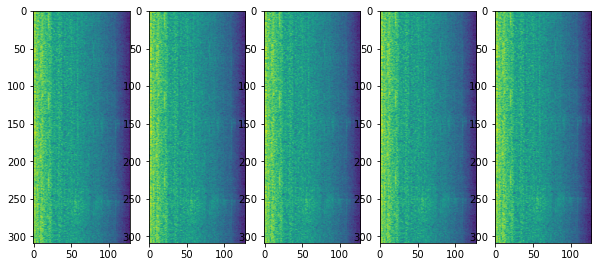

In [44]:
# 06 generate feature vectors by concatenating multiframes
fig, axis = plt.subplots(1, frames, figsize=(10, 70))
vector_array = numpy.zeros((vector_array_size, dims))
for t in range(frames):
    vector_array[:, n_mels * t: n_mels * (t + 1)] = log_mel_spectrogram[:, t: t + vector_array_size].T
    axis[t].imshow(log_mel_spectrogram[:, t: t + vector_array_size].T)
    print(n_mels * t, n_mels * (t + 1))
    print('======')

In [33]:
vector_array.shape

(309, 640)

(128, 313)


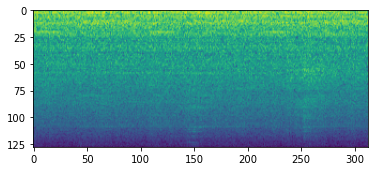

In [36]:
print(log_mel_spectrogram.shape)
plt.imshow(log_mel_spectrogram)

(309, 128)


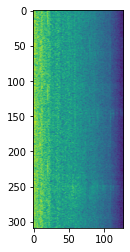

In [38]:
print(log_mel_spectrogram[:, t : t + vector_array_size].T.shape)
plt.imshow(log_mel_spectrogram[:, t : t + vector_array_size].T)